<a href="https://colab.research.google.com/github/DebarajPurohit/Hotel_booking_analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [3]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Almabetter/CAPSTONE PROJECT/PROJECT-1 EDA/HOTEL BOOKING EDA/Hotel Bookings.csv'

In [4]:
hotel_df = pd.read_csv(file_path)

In [5]:
hotel_df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15


In [6]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## 1. Booking growth in hotel
## --- Year Wise
##--- Country wise
## 2. Percentage for booking each year

## To get the exact data of booking growth each year, we have to first group the data Year Wise and then we have to group the data as per Hotel Type. We then sort the data as per reservation_status.

In [84]:
year_wise_df = hotel_df.groupby(['arrival_date_year', 'reservation_status'])[['hotel']].count().unstack()

In [85]:
year_wise_df

hotel                  
reservation_status Canceled Check-Out No-Show
arrival_date_year                            
2015                   7951     13854     191
2016                  19669     36370     668
2017                  15397     24942     348

In [86]:
year_wise_df = hotel_df.groupby(['arrival_date_year','hotel','reservation_status'])[['reservation_status']].count().unstack()

In [87]:
year_wise_df

reservation_status                  
reservation_status                       Canceled Check-Out No-Show
arrival_date_year hotel                                            
2015              City Hotel                 5882      7678     122
                  Resort Hotel               2069      6176      69
2016              City Hotel                14852     22733     555
                  Resort Hotel               4817     13637     113
2017              City Hotel                11452     15817     239
                  Resort Hotel               3945      9125     109

## To sum the elements of MultiIndex Dataframe, we have sum().

In [88]:
year_wise_df['total_booking'] = year_wise_df.sum(level=0, axis=1)

In [89]:
year_wise_df

reservation_status  ... total_booking
reservation_status                       Canceled  ...              
arrival_date_year hotel                            ...              
2015              City Hotel                 5882  ...         13682
                  Resort Hotel               2069  ...          8314
2016              City Hotel                14852  ...         38140
                  Resort Hotel               4817  ...         18567
2017              City Hotel                11452  ...         27508
                  Resort Hotel               3945  ...         13179

[6 rows x 4 columns]

## **Percentage of Booking (of a specified hotel type/all hotel types) in a year =  Booking in that year/overall booking in 3 years**
## We have data of Resort Hotel and City Hotel is given seaparetly year wise. Our next step is get the sum of Resort Hotel and City Hotel over 2 years from 2015 to 2017

In [20]:
year_wise_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 6 entries, (2015, 'City Hotel') to (2017, 'Resort Hotel')
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   (reservation_status, Canceled)   6 non-null      int64  
 1   (reservation_status, Check-Out)  6 non-null      int64  
 2   (reservation_status, No-Show)    6 non-null      int64  
 3   (total_booking, )                6 non-null      int64  
 4   (valid_booking %, )              6 non-null      float64
dtypes: float64(1), int64(4)
memory usage: 412.0+ bytes


In [21]:
Total_booking_3years = year_wise_df.groupby(['hotel']).sum()

In [22]:
Total_booking_3years

reservation_status            ... total_booking valid_booking %
reservation_status           Canceled Check-Out  ...                              
hotel                                            ...                              
City Hotel                      32186     46228  ...         79330      173.221253
Resort Hotel                    10831     28938  ...         40060      216.970795

[2 rows x 5 columns]

In [23]:
Total_booking_3years.index

Index(['City Hotel', 'Resort Hotel'], dtype='object', name='hotel')

In [24]:
total_no_of_bookings = Total_booking_3years['total_booking'].sum()

In [25]:
total_no_of_bookings

119390

## Q1. What is the percentage of booking as per hotel type over 3 years?
## **For Resort hotel type**
##          **% of booking (Resort Hotel) = total bookings for Resort Hotel in 3 years/ overall booking in 3 years**
## **For City hotel type**
##          **% of booking (City Hotel) = total bookings for City hotel in 3 years/ overall booking in 3 years**

In [26]:
Total_booking_3years['% Booking'] = (Total_booking_3years['total_booking']/total_no_of_bookings)*100

In [27]:
Total_booking_3years

reservation_status            ... valid_booking %  % Booking
reservation_status           Canceled Check-Out  ...                           
hotel                                            ...                           
City Hotel                      32186     46228  ...      173.221253  66.446101
Resort Hotel                    10831     28938  ...      216.970795  33.553899

[2 rows x 6 columns]

In [28]:
Total_booking_3years.index

Index(['City Hotel', 'Resort Hotel'], dtype='object', name='hotel')

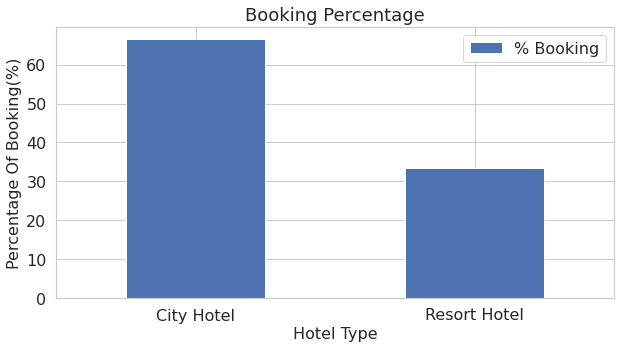

In [127]:
ax1=Total_booking_3years.plot.bar(x= 'Hotel',y= '% Booking', figsize=(10,5), fontsize= 16, rot = 0)
ax1.set_title('Booking Percentage', fontsize= 18)
ax1.set_xlabel('Hotel Type', fontsize= 16)
ax1.set_ylabel('Percentage Of Booking(%)', fontsize= 16)
ax1.legend(fontsize= 16)
#Total_booking_3years

## As per the given Dataset from the year 2015 to year 2017, City Hotel is preferred by **66.45%** of people. The possible reasons may be because of 
## 1. Low Cost
## 2. Easy availability
## The above graph shows overall booking status which includes the cancelled booking also, in futher study, we will dig down and study the data more deeply. Let's go back to our original dataframe i.e, **hotel_df**

In [30]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [133]:
cancellation_df = hotel_df.groupby(['hotel','is_canceled'])['is_canceled'].count().unstack()

In [134]:
cancellation_df

is_canceled,0,1
hotel,,
City Hotel,46228,33102
Resort Hotel,28938,11122


In [135]:
cancellation_df.rename(columns = {1:'canceled bookings',0:'confirmed bookings'}, inplace= True)

In [136]:
cancellation_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, City Hotel to Resort Hotel
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   confirmed bookings  2 non-null      int64
 1   canceled bookings   2 non-null      int64
dtypes: int64(2)
memory usage: 48.0+ bytes


In [137]:
cancellation_df['Total_booking_hotel_wise'] = cancellation_df['confirmed bookings']+ cancellation_df['canceled bookings']

In [138]:
cancellation_df

is_canceled,confirmed bookings,canceled bookings,Total_booking_hotel_wise
hotel,,,
City Hotel,46228,33102,79330
Resort Hotel,28938,11122,40060


In [37]:
Total_booking = cancellation_df['Total_booking_hotel_wise'].sum()

In [139]:
cancellation_df['Booking_%_wrt_total_booking'] = (cancellation_df['Total_booking_hotel_wise']/Total_booking)*100

In [140]:
cancellation_df

is_canceled,confirmed bookings,canceled bookings,Total_booking_hotel_wise,Booking_%_wrt_total_booking
hotel,,,,
City Hotel,46228,33102,79330,66.446101
Resort Hotel,28938,11122,40060,33.553899


In [141]:
Total_cancellation = cancellation_df['canceled bookings'].sum()

In [142]:
cancellation_df['cancellation_%_wrt_total_booking'] = (cancellation_df['canceled bookings']/Total_booking)*100

In [143]:
cancellation_df

is_canceled,confirmed bookings,canceled bookings,Total_booking_hotel_wise,Booking_%_wrt_total_booking,cancellation_%_wrt_total_booking
hotel,,,,,
City Hotel,46228,33102,79330,66.446101,27.725940
Resort Hotel,28938,11122,40060,33.553899,9.315688


In [144]:
cancellation_df.insert(0,'HotelType', cancellation_df.index)

In [145]:
cancellation_df

is_canceled,HotelType,confirmed bookings,canceled bookings,Total_booking_hotel_wise,Booking_%_wrt_total_booking,cancellation_%_wrt_total_booking
hotel,,,,,,
City Hotel,City Hotel,46228,33102,79330,66.446101,27.725940
Resort Hotel,Resort Hotel,28938,11122,40060,33.553899,9.315688


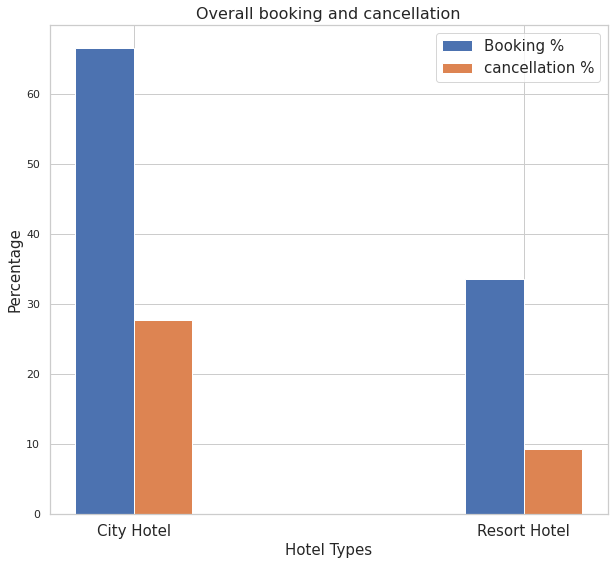

In [146]:
fig, ax1= plt.subplots(figsize=(10,9))
#sns.barplot(kind= 'bar', x= 'HotelType', y='Booking_%_wrt_total_booking', data= cancellation_df, ax=ax1)
labels = ['City Hotel', 'Resort Hotel']
x = np.arange(len(labels))
width = 0.15
ax1.bar(x-width/2,'Booking_%_wrt_total_booking', width, label='Booking %', data= cancellation_df)
ax1.set_xlabel('Hotel Types', fontsize= 15)
ax1.bar(x+width/2,'cancellation_%_wrt_total_booking', width, label='cancellation %', data= cancellation_df)
ax1.set_ylabel('Percentage', fontsize= 15)
ax1.set_title('Overall booking and cancellation', fontsize= 16)
ax1.set_xticks(x)
ax1.set_xticklabels(labels, fontsize= 15)
ax1.legend(fontsize= 15)
plt.show()

# **Booking growth in hotel year wise**
## To analyse the above question properly we have to group the hotels year wise for bookings that are not cancelled.

In [90]:
year_wise_df['valid_booking %'] = (year_wise_df[('reservation_status','Check-Out')]/year_wise_df[('total_booking','')])*100

In [91]:
year_wise_df

reservation_status  ... valid_booking %
reservation_status                       Canceled  ...                
arrival_date_year hotel                            ...                
2015              City Hotel                 5882  ...       56.117527
                  Resort Hotel               2069  ...       74.284340
2016              City Hotel                14852  ...       59.604090
                  Resort Hotel               4817  ...       73.447514
2017              City Hotel                11452  ...       57.499636
                  Resort Hotel               3945  ...       69.238941

[6 rows x 5 columns]

In [116]:
valid_booking_df = year_wise_df.groupby(['hotel','arrival_date_year'])['valid_booking %'].mean().unstack()

In [117]:
valid_booking_df

arrival_date_year,2015,2016,2017
hotel,,,
City Hotel,56.117527,59.604090,57.499636
Resort Hotel,74.284340,73.447514,69.238941


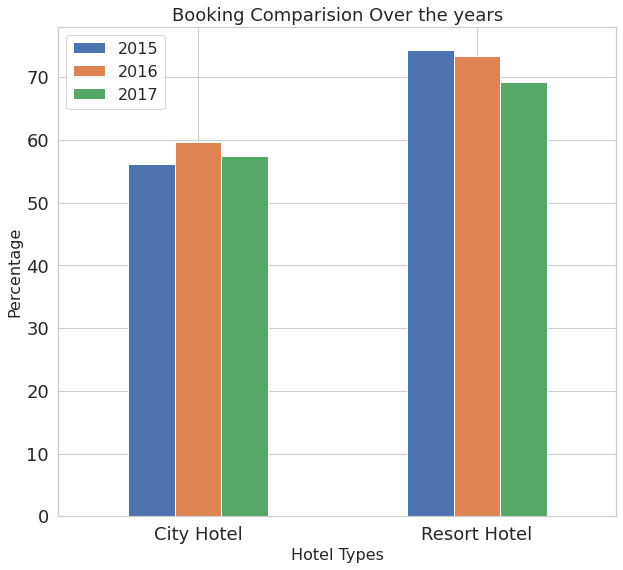

In [147]:
ax1=valid_booking_df.plot.bar(figsize = (10,9), fontsize = 18, rot=0)
ax1.set_title('Booking Comparision Over the years', fontsize= 18)
ax1.set_xlabel('Hotel Types', fontsize=16)
ax1.set_ylabel('Percentage', fontsize=16)
ax1.legend(fontsize=16)